In [2]:
import numpy as np
import glob
import skimage
import scipy
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import svm

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore')

In [3]:
Descripteurs_test = np.load('Descripteurs_test.npy')
Descripteurs = np.load('Descripteurs.npy')
Classe = np.load('Classe.npy')

In [4]:
features_train, features_test, labels_train, labels_test = train_test_split(Descripteurs,Classe,test_size=0.2,
                                                                            random_state=1, stratify = Classe)

# Logistic Classifier

In [5]:
logistic_classifier = LogisticRegression()

In [6]:
logistic_classifier.fit(Descripteurs, Classe)
prediction = logistic_classifier.predict(features_test)

In [7]:
scores_logistic = cross_val_score(logistic_classifier, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_logistic)
print('Mean score: %0.3f' % np.mean(scores_logistic))

Scores on each CV fold: [0.91836735 0.95977237 0.84811617 0.92013344 0.89010989 0.90992936
 0.8282967  0.94070513 0.94791667 0.88942308 0.89102564 0.96153846
 0.95192308 0.87132353 0.84497549 0.8872549  0.94117647 0.75490196
 0.92830882 0.92156863]
Mean score: 0.900


# KNN Classifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(Descripteurs, Classe)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform')

In [9]:
scores_knn = cross_val_score(knn, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_knn)
print('Mean score: %0.3f' % np.mean(scores_knn))

Scores on each CV fold: [0.711146   0.68288854 0.6516876  0.66424647 0.81259812 0.73390895
 0.67503925 0.74679487 0.73637821 0.75560897 0.78525641 0.82612179
 0.84535256 0.78431373 0.73835784 0.68137255 0.78186275 0.79963235
 0.84252451 0.76470588]
Mean score: 0.751


In [10]:
knn_mean_scores = []

for i in range(1,40):
    knn_i = knn = KNeighborsClassifier(n_neighbors=i)
    knn_i.fit(features_train, labels_train)
    scores_knn_i = cross_val_score(knn_i, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
    knn_mean_scores.append(np.mean(scores_knn_i))
print(knn_mean_scores)

[0.7398771527841906, 0.7243688821682519, 0.7618464693569736, 0.7495829581832734, 0.7490166258811218, 0.7486247864530425, 0.7463852367870225, 0.7500468456613414, 0.7618060685812786, 0.7527885673500169, 0.759006342921784, 0.7534013124480562, 0.7514258588050605, 0.7459717059900883, 0.7521776499061164, 0.7408245509742358, 0.7515814017914858, 0.743954264398067, 0.7488358324098872, 0.7461484112875919, 0.7494437678917721, 0.7478662137932096, 0.7483632395265799, 0.7525582348323946, 0.753731781174008, 0.7501486171391634, 0.7543114842090681, 0.7545048788746267, 0.7508683761966324, 0.7509898671006864, 0.7521185397235817, 0.751740407701542, 0.7525886797026502, 0.7493083771970326, 0.7532190279958136, 0.753400591005633, 0.7578063436913226, 0.7540133841998339, 0.7548321732539168]


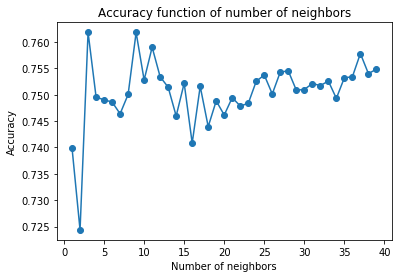

In [11]:
plt.plot(range(1, 40), knn_mean_scores, marker='o')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy function of number of neighbors')
plt.show()

In [12]:
knn_optimal = KNeighborsClassifier(n_neighbors=3)
knn_optimal.fit(Descripteurs, Classe)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [13]:
scores_knn_optimal = cross_val_score(knn_optimal, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_knn)
print('Mean score: %0.3f' % np.mean(scores_knn))

Scores on each CV fold: [0.711146   0.68288854 0.6516876  0.66424647 0.81259812 0.73390895
 0.67503925 0.74679487 0.73637821 0.75560897 0.78525641 0.82612179
 0.84535256 0.78431373 0.73835784 0.68137255 0.78186275 0.79963235
 0.84252451 0.76470588]
Mean score: 0.751


# K-means

In [14]:
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(Descripteurs)

In [15]:
scores_kmeans = cross_val_score(kmeans, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_kmeans)
print('Mean score: %0.3f' % np.mean(scores_kmeans))

Scores on each CV fold: [0.35       0.74       0.65416667 0.31       0.33       0.36
 0.4        0.65       0.69       0.26       0.3        0.68
 0.22       0.66037736 0.34       0.32083333 0.66       0.26666667
 0.72       0.35      ]
Mean score: 0.463


# SVM

In [16]:
clf = svm.SVC(gamma='scale')

In [17]:
clf.fit(Descripteurs,Classe)
svm_predict = clf.predict(features_test)

In [18]:
scores_svm = cross_val_score(clf, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_kmeans)
print('Mean score: %0.3f' % np.mean(scores_kmeans))

Scores on each CV fold: [0.35       0.74       0.65416667 0.31       0.33       0.36
 0.4        0.65       0.69       0.26       0.3        0.68
 0.22       0.66037736 0.34       0.32083333 0.66       0.26666667
 0.72       0.35      ]
Mean score: 0.463


svm_predict

# Random Forest

In [19]:
rfc = RandomForestClassifier(n_estimators=100)

In [20]:
rfc.fit(Descripteurs,Classe)
scores_rfc = cross_val_score(rfc, Descripteurs, Classe, cv = 20, scoring='balanced_accuracy')
print('Scores on each CV fold: %s' % scores_rfc)
print('Mean score: %0.3f' % np.mean(scores_rfc))

Scores on each CV fold: [0.81691523 0.94956829 0.85890895 0.9399529  0.93877551 0.92013344
 0.87755102 0.9599359  0.89583333 0.83653846 0.84855769 0.96955128
 0.96073718 0.92034314 0.84497549 0.84436275 0.98039216 0.89215686
 0.88664216 0.97058824]
Mean score: 0.906


# Neural Network

In [1]:
import tensorflow as tf

ImportError: Traceback (most recent call last):
  File "/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: dlopen(/Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 6): Symbol not found: _SecKeyCopyExternalRepresentation
  Referenced from: /Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so (which was built for Mac OS X 10.12)
  Expected in: /System/Library/Frameworks/Security.framework/Versions/A/Security
 in /Users/Sebastien/miniconda3/envs/Optimisation/lib/python3.5/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/install_sources#common_installation_problems

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [ ]:
Descripteurs.shape

In [ ]:
Descripteurs[0].shape
Classe = Classe.reshape(-1, 1)

In [ ]:
tf_features = tf.placeholder(tf.float32, shape=[None, 40])
tf_targets = tf.placeholder(tf.float32, shape=[None, 1])

In [ ]:
# First
w1 = tf.Variable(tf.random_normal([40, 1600]))
b1 = tf.Variable(tf.zeros([1600]))
# Operations
z1 = tf.matmul(tf_features, w1) + b1
a1 = tf.nn.sigmoid(z1)

# Second 

w_inter = tf.Variable(tf.random_normal([1600, 1600]))
b_inter = tf.Variable(tf.zeros([1600]))

# Operations

z_inter = tf.matmul(a1, w_inter) + b_inter
a_inter = tf.nn.sigmoid(z_inter)

# Output neuron
w2 = tf.Variable(tf.random_normal([1600, 1]))
b2 = tf.Variable(tf.zeros([1]))
# Operations
z2 = tf.matmul(a_inter, w2) + b2
py = tf.nn.sigmoid(z2)

cost = tf.reduce_mean(tf.square(py - tf_targets))

correct_prediction = tf.equal(tf.round(py), tf_targets)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for e in range(100):

        sess.run(train, feed_dict={
            tf_features: Descripteurs,
            tf_targets: Classe
        })

        print("accuracy =", sess.run(accuracy, feed_dict={
            tf_features: Descripteurs,
            tf_targets: Classe
        }))
        


# 2 Hidden layers

In [ ]:
# First
w1 = tf.Variable(tf.random_normal([40, 1600]))
b1 = tf.Variable(tf.zeros([1600]))
# Operations
z1 = tf.matmul(tf_features, w1) + b1
a1 = tf.nn.sigmoid(z1)

# Second 

w_inter_1 = tf.Variable(tf.random_normal([1600, 1600]))
b_inter_1 = tf.Variable(tf.zeros([1600]))

# Operations

z_inter_1 = tf.matmul(a1, w_inter_1) + b_inter
a_inter_1 = tf.nn.sigmoid(z_inter_1)

# Third 

w_inter_2 = tf.Variable(tf.random_normal([1600, 1600]))
b_inter_2 = tf.Variable(tf.zeros([1600]))

# Operations

z_inter_2 = tf.matmul(a_inter_1, w_inter_2) + b_inter_2
a_inter_2 = tf.nn.sigmoid(z_inter_2)

# Output neuron
w2 = tf.Variable(tf.random_normal([1600, 1]))
b2 = tf.Variable(tf.zeros([1]))
# Operations
z2 = tf.matmul(a_inter_2, w2) + b2
py = tf.nn.sigmoid(z2)

cost = tf.reduce_mean(tf.square(py - tf_targets))

correct_prediction = tf.equal(tf.round(py), tf_targets)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=1.0)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [ ]:
for e in range(100):

        sess.run(train, feed_dict={
            tf_features: Descripteurs,
            tf_targets: Classe
        })

        print("accuracy =", sess.run(accuracy, feed_dict={
            tf_features: Descripteurs,
            tf_targets: Classe
        }))
        


In [21]:
score_NN = np.ones(20)*0.5165

In [22]:
score_NN

array([0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165,
       0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165, 0.5165,
       0.5165, 0.5165, 0.5165, 0.5165])

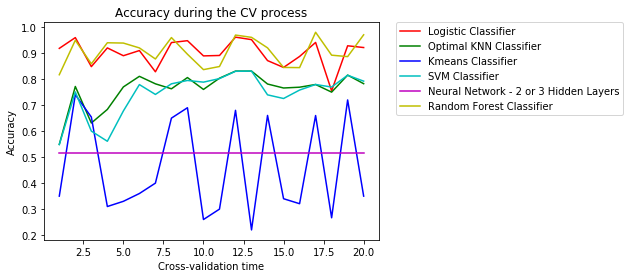

In [24]:
plt.plot(range(1,21), scores_logistic, 'r')
plt.plot(range(1,21), scores_knn_optimal, 'g')
plt.plot(range(1,21), scores_kmeans, 'b')
plt.plot(range(1,21), scores_svm, 'c')
plt.plot(range(1,21), score_NN, 'm')
plt.plot(range(1,21), scores_rfc, 'y')

plt.xlabel('Cross-validation time')
plt.ylabel('Accuracy')
plt.title('Accuracy during the CV process')
plt.legend(['Logistic Classifier','Optimal KNN Classifier','Kmeans Classifier','SVM Classifier','Neural Network - 2 or 3 Hidden Layers','Random Forest Classifier'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()